In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score



In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df1=df.copy()

In [4]:
df1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df1 = df1.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'},
    errors="raise")

In [8]:
df1['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

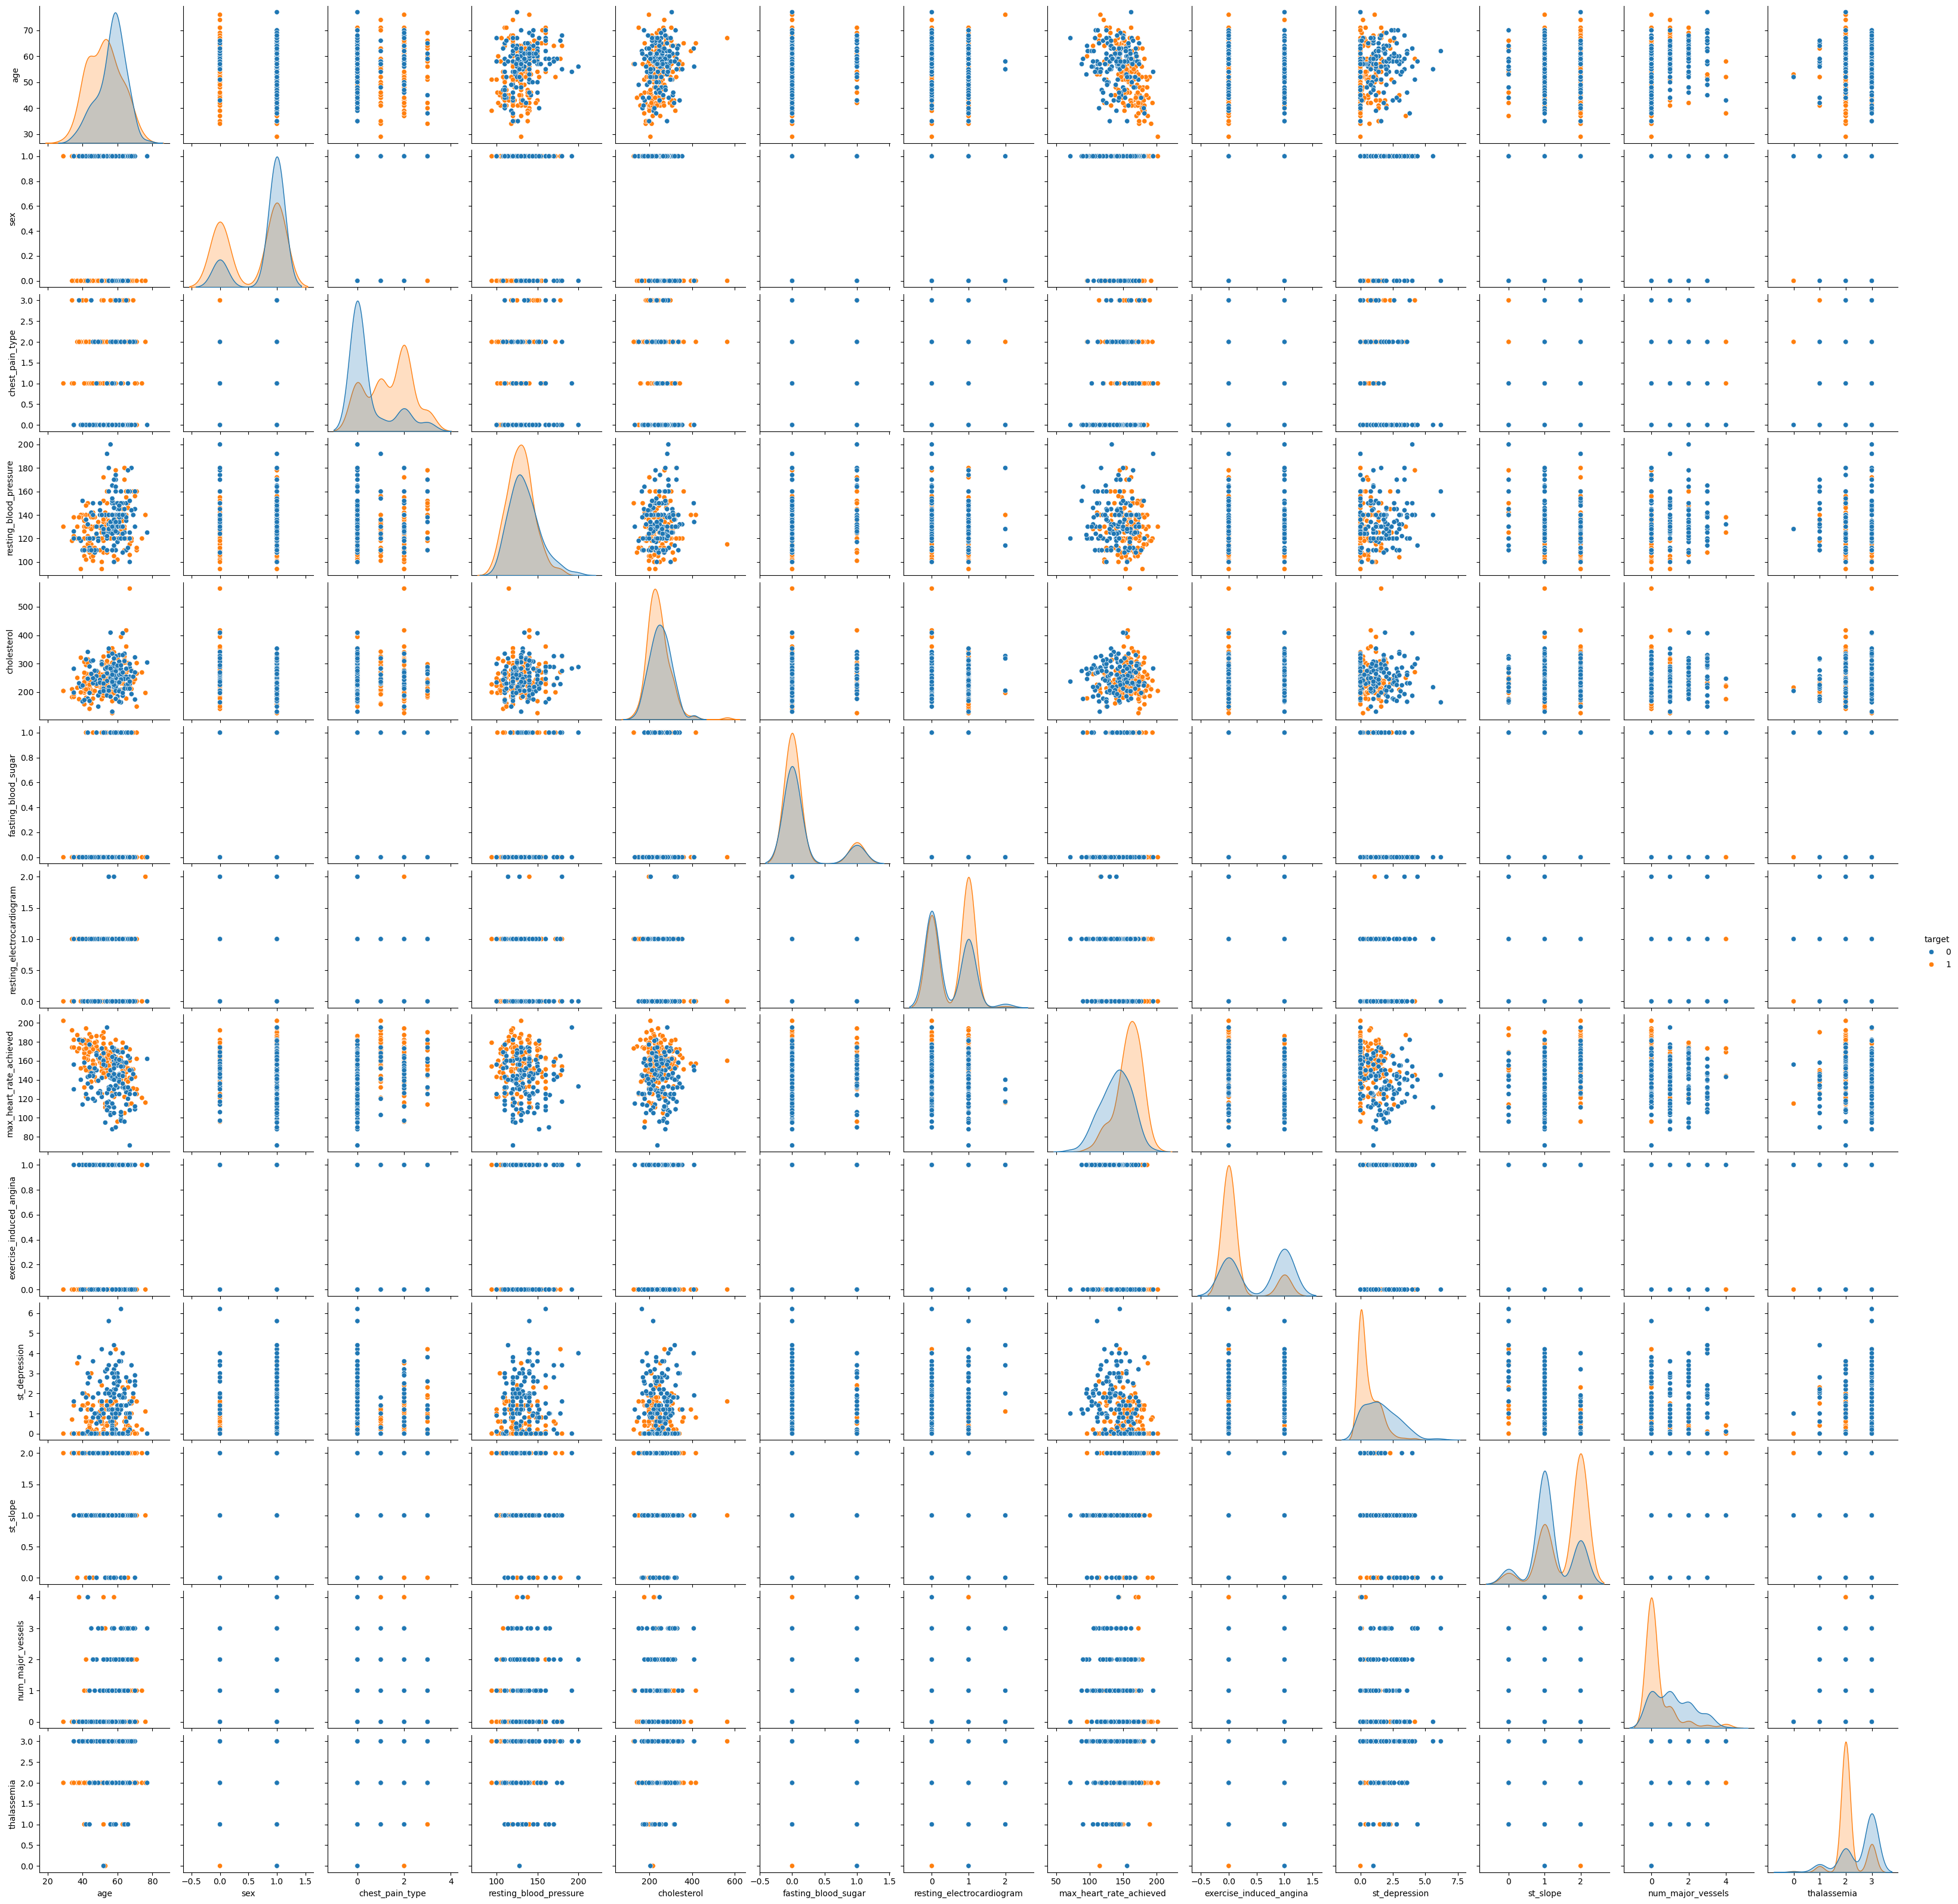

In [9]:
sns.pairplot(df1,hue='target')

In [120]:
# Group data by Sex and Survived to get counts

target_counts = df.groupby(['sex', 'target']).size().reset_index(name='Count')

# Create a column for the survival status for better labeling
target_counts['target Status'] = target_counts['target'].map({0: 'not have heart disease', 1: 'have heart disease'})

# Separate data for survivors and non-survivors
survived_df = target_counts[target_counts['target'] == 0]
not_survived_df = target_counts[target_counts['target'] == 1]

# Create pie chart for survivors
fig_survived = px.pie(survived_df, values='Count', names='sex', title='Uninfected by Gender', 
                      labels={'sex': 'Gender', 'Count': 'Number of Uninfected'},
                      color_discrete_sequence=px.colors.qualitative.Set3)

# Create pie chart for non-survivors
fig_not_survived = px.pie(not_survived_df, values='Count', names='sex', title='infected by Gender', 
                          labels={'sex': 'Gender', 'Count': 'Number of infected'},
                          color_discrete_sequence=px.colors.qualitative.Set3)

# Update layout to add legend and titles
fig_survived.update_layout(showlegend=True, legend_title="Gender")
fig_not_survived.update_layout(showlegend=True, legend_title="Gender")

# Display the charts
fig_survived.show()
fig_not_survived.show()

In [110]:
df1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'cateAge'],
      dtype='object')

In [123]:
# Group data by Sex and Survived to get counts

target_counts = df1.groupby(['chest_pain_type', 'target']).size().reset_index(name='Count')

# Create a column for the survival status for better labeling
target_counts['target Status'] = target_counts['target'].map({0: 'not have heart disese', 1: 'have heart dises'})

not_survived_df = target_counts[target_counts['target'] == 1]

# Create pie chart for non-survivors
fig_not_survived = px.pie(not_survived_df, values='Count', names='chest_pain_type', title='infected by Gender', 
                          labels={'sex': 'Gender', 'Count': 'Number of infected'},
                          color_discrete_sequence=px.colors.qualitative.Set1)


fig_not_survived.update_layout(showlegend=True, legend_title="Gender")


fig_not_survived.show()

- 0 typical angina
- 1 atypical angina 
- 2 non-anginal  (higher)
- 3 pain asymptomatic 

In [9]:
df1.groupby(['target'])['age'].mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

In [47]:
#[0, 12, 18,40,65,100]
# ['Children', 'Teens', 'Adults', 'Mid Adults','Elderly'])
def cateAge(age):
    if age > 0 and age<=12:
        return 'Children'
    elif age > 12 and age<=19:
        return 'Teens'
    elif age > 19 and age<=35:
        return 'Mid Adults'
    elif age > 35 and age<=60:
        return ' Adults'
    else :
        return 'Elderly'

 
df1['cateAge'] = df1['age'].apply(cateAge)

In [48]:
df1['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [12]:
age_group_survival_rate = df1.groupby('cateAge')['target'].mean()
age_group_counts_survived = df1.groupby('cateAge')['target'].sum()
age_group_counts_total = df1['cateAge'].value_counts()
# Display the survival rate and count for each age group
age_group_stats = pd.DataFrame({
    'Total Count': age_group_counts_total,
    'Survived Count': age_group_counts_survived,
    'Survival Rate': age_group_survival_rate
})
print(age_group_stats)

            Total Count  Survived Count  Survival Rate
 Adults             217             125       0.576037
Elderly              79              35       0.443038
Mid Adults            7               5       0.714286


In [13]:
age_group_survival_rate = df1.groupby('cateAge')['target'].count().reset_index()

# Create a bar chart using Plotly
fig = px.bar(age_group_survival_rate, x='cateAge', y='target',
             labels={'cateAge': 'cateAge', 'target': 'target Rate'},
             title='heart disease Rate by Age Group')
fig.show()

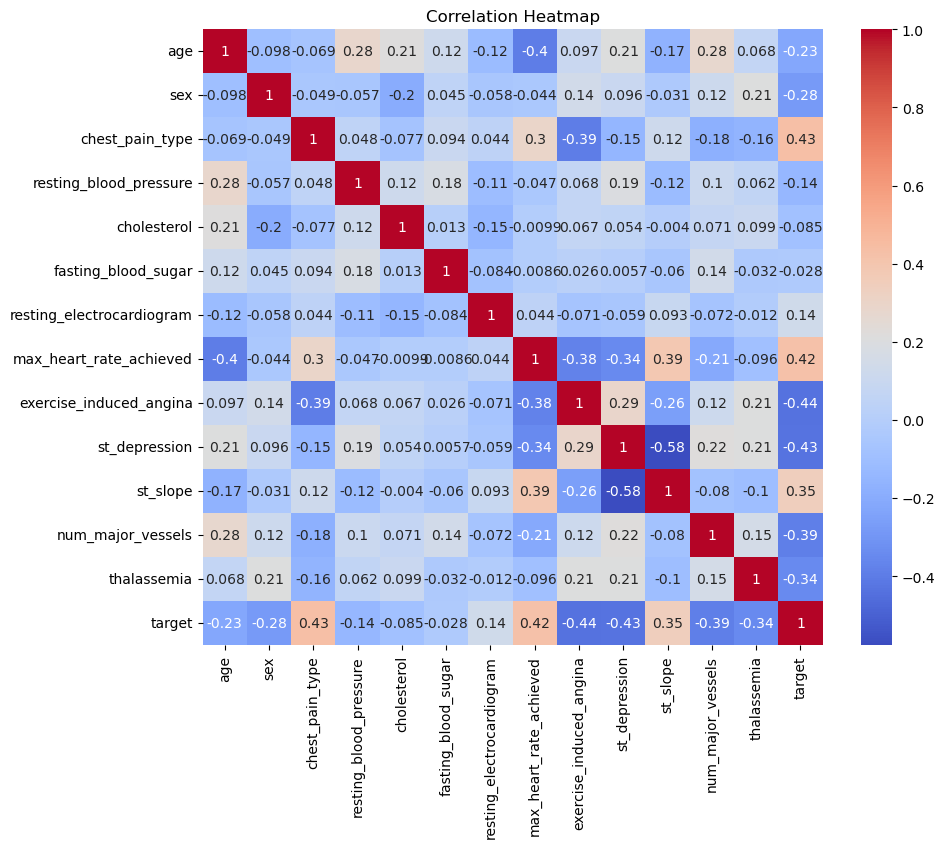

In [6]:

plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df1.corr()['target'].sort_values(ascending=False)

target                       1.000000
chest_pain_type              0.433798
max_heart_rate_achieved      0.421741
st_slope                     0.345877
resting_electrocardiogram    0.137230
fasting_blood_sugar         -0.028046
cholesterol                 -0.085239
resting_blood_pressure      -0.144931
age                         -0.225439
sex                         -0.280937
thalassemia                 -0.344029
num_major_vessels           -0.391724
st_depression               -0.430696
exercise_induced_angina     -0.436757
Name: target, dtype: float64

In [8]:
columns = ['resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar','num_major_vessels','st_depression']

# Function to detect outliers using IQR method
def detect_outliers(df1, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers.drop_duplicates()

In [8]:
float_merged_df=df1.select_dtypes(include=['float64','int64']).columns
for col in float_merged_df:
    fig = px.box(float_merged_df, y=df1[col])
    fig.update_layout(yaxis_title=col)
    fig.show()

In [24]:
df1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'cateAge'],
      dtype='object')

In [ ]:
sns.pairplot(df1,hue='target')

In [ ]:
for col in df1:
    fig = px.histogram(df1, x=col)
    fig.update_layout(xaxis_title=col, yaxis_title='Count')
    fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['cateAge'] = le.fit_transform(df1['cateAge'])
   

In [ ]:
df1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'cateAge'],
      dtype='object')

In [9]:
x=df1[['sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'age']]
y=df1[['target']]

In [72]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30  5]
 [ 4 37]]


0.881578947368421

In [77]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Text(0.5, 0, 'K Value')

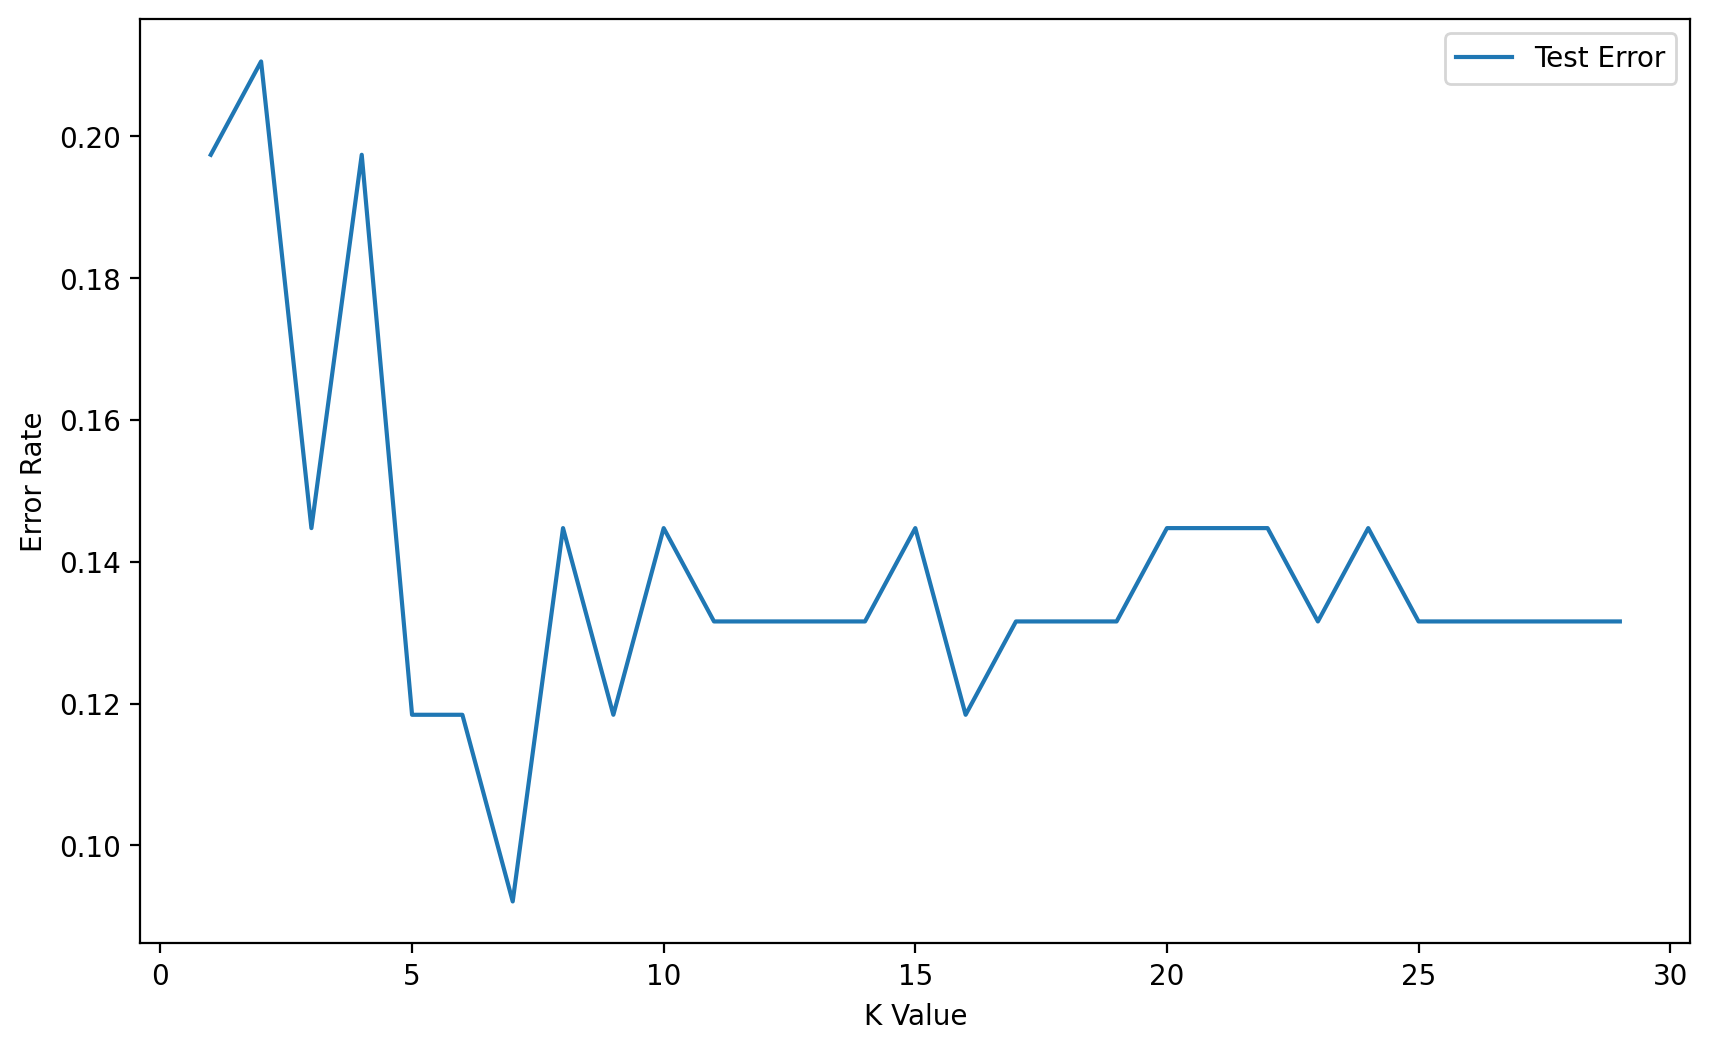

In [16]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[31  4]
 [ 3 38]]


0.9078947368421053

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [77]:
y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

Accuracy 88.16%


In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28  7]
 [ 5 36]]


0.8421052631578947

In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0

)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30  5]
 [11 30]]


0.7894736842105263